In [4]:
import pandas as pd
import numpy as np 
#### 
from sklearn.model_selection import train_test_split , StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
#df = pd.read_csv('./2K_1420_part_1234567features.csv',delimiter=';',index_col=False) 




df = pd.read_csv('/Users/pooyan/Documents/Emerson/data/data.csv', index_col=False, sep=";", header=0)
#set 0 as normal as 1 as abnormal
df.insert(3, 'target', 0)

# df.drop('Rows Header(1)')
df



indexes = []
df['target']= 0

indexes = df[df['RU.LNG.214LRSA450.PV'] <= 47].index | \
df[df['RU.LNG.214LRSA450.PV'] <= 45].index | \
df[df['RU.LNG.214TRA220.PV'] > df['RU.LNG.214TRA220.PV'].quantile(0.99)].index  |\
df[df['RU.LNG.214PRA218C.PV'] < df['RU.LNG.214PRA218C.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214TRA476A.PV'] < df['RU.LNG.214TRA476A.PV'].quantile(0.01)].index  |\
df[df['RU.LNG.214PZA451A.PV'] < df['RU.LNG.214PZA451A.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PDRA425.PV'] < df['RU.LNG.214PDRA425.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PRA431.PV'] > df['RU.LNG.214PRA431.PV'].quantile(0.99)].index  |\
df[df['RU.LNG.214PRA434.PV'] > df['RU.LNG.214PRA434.PV'].quantile(0.99)].index  |\
df[df['RU.LNG.214PRA218.PV'] < df['RU.LNG.214PRA218.PV'].quantile(0.01)].index  |\
df[df['RU.LNG.214PDRA436.PV'] < df['RU.LNG.214PDRA436.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214SZA458.PV'] < df['RU.LNG.214SZA458.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PRA221A.PV'] < df['RU.LNG.214PRA221A.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PRA221B.PV'] < df['RU.LNG.214PRA221B.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214TR210.PV'] > df['RU.LNG.214TR210.PV'].quantile(0.99)].index |\
df[df['RU.LNG.214PRA218A.PV'] < df['RU.LNG.214PRA218A.PV'].quantile(0.01)].index 

#df[df['RU.LNG.214TRA476A.PV'] > df['RU.LNG.214TRA476A.PV'].quantile(0.99)].index   |\

df.loc[indexes, 'target'] = 1
print("Abnormal samples: ",len(df[df['target']==1]), "Normal samples: ",len(df[df['target']==0]) )

Abnormal samples:  3388 Normal samples:  67173


<ipython-input-4-427dcccfb143>:31: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  indexes = df[df['RU.LNG.214LRSA450.PV'] <= 47].index | \
<ipython-input-4-427dcccfb143>:31: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  indexes = df[df['RU.LNG.214LRSA450.PV'] <= 47].index | \
<ipython-input-4-427dcccfb143>:31: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  indexes = df[df['RU.LNG.214LRSA450.PV'] <= 47].index | \
<ipython-input-4-427dcccfb143>:31: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.unio

In [11]:
    
index1 = []
index2 = []
df['target']= 0

#condition 1

index1 = df[df['RU.LNG.214TRA220.PV'] > df['RU.LNG.214TRA220.PV'].quantile(0.99)].index  |\
df[df['RU.LNG.214PRA218C.PV'] < df['RU.LNG.214PRA218C.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214TRA476A.PV'] < df['RU.LNG.214TRA476A.PV'].quantile(0.01)].index  |\
df[df['RU.LNG.214PZA451A.PV'] < df['RU.LNG.214PZA451A.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PDRA425.PV'] < df['RU.LNG.214PDRA425.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PRA431.PV'] > df['RU.LNG.214PRA431.PV'].quantile(0.99)].index  |\
df[df['RU.LNG.214PRA434.PV'] > df['RU.LNG.214PRA434.PV'].quantile(0.99)].index  |\
df[df['RU.LNG.214PRA218.PV'] < df['RU.LNG.214PRA218.PV'].quantile(0.01)].index  |\
df[df['RU.LNG.214PDRA436.PV'] < df['RU.LNG.214PDRA436.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214SZA458.PV'] < df['RU.LNG.214SZA458.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PRA221A.PV'] < df['RU.LNG.214PRA221A.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PRA221B.PV'] < df['RU.LNG.214PRA221B.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214TR210.PV'] > df['RU.LNG.214TR210.PV'].quantile(0.99)].index |\
df[df['RU.LNG.214PRA218A.PV'] < df['RU.LNG.214PRA218A.PV'].quantile(0.01)].index
    
    
#condition 2    
    
    
index2 = df[df['RU.LNG.214LRSA450.PV'] <= 55].index | \
df[df['RU.LNG.214LRSA450.PV'] <= 45].index 
    
  
#defining labels
df.loc[index1, 'target'] = 1  
df.loc[index2, 'target'] = 2  
    
 
print("Abnormal samples: ",len(df[df['target']==1]), "class2 samples: ",len(df[df['target']==2]) )    





Abnormal samples:  3388 class2 samples:  46


<ipython-input-11-57b3e9110bd2>:7: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index1 = df[df['RU.LNG.214TRA220.PV'] > df['RU.LNG.214TRA220.PV'].quantile(0.99)].index  |\
<ipython-input-11-57b3e9110bd2>:7: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index1 = df[df['RU.LNG.214TRA220.PV'] > df['RU.LNG.214TRA220.PV'].quantile(0.99)].index  |\
<ipython-input-11-57b3e9110bd2>:7: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index1 = df[df['RU.LNG.214TRA220.PV'] > df['RU.LNG.214TRA220.PV'].quantile(0.99)].index  |\
<ipython-input-11-57b3e9110bd2>:7: FutureWarning: Index.__or__ operating as a set operat

In [12]:



X = df.loc[:,'RU.LNG.214PZA451A.PV':].to_numpy() # all measurement columns
y = df['target'].to_numpy() # labels 



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)



from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#model


# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)



# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#cm

from sklearn.metrics import confusion_matrix


print(confusion_matrix(y_test, y_pred))


/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:23:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 99.97%
[[13403     3     0]
 [    1   694     0]
 [    0     0    12]]


In [19]:
type(confusion_matrix)

function

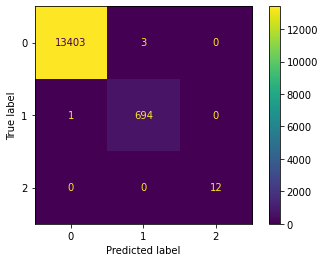

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)  
plt.show()